# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [37]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
from pathlib import Path
load_dotenv()
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sprin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Python-dotenv could not parse statement starting at line 3


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q='bitcoin',    
    language='en',
    page_size=100,
    sort_by='relevancy'
)
print(f"Total articles: {bitcoin_headlines['totalResults']}")
#bitcoin_headlines

Total articles: 7393


In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q='ethereum',    
    language='en',
    page_size=100,
    sort_by='relevancy'
)
print(f"Total articles: {ethereum_headlines['totalResults']}")

Total articles: 3583


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines ["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

In [8]:
# Create DataFrame
df_bitcoin = pd.DataFrame(bitcoin_sentiments)
df_bitcoin.head()


,text,date,compound,positive,negative,neutral
0,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,0.0000,0.000,0.000,1.000
1,"""Bitcoin was seen by many of its libertarian-l...",2022-03-12,-0.7713,0.000,0.169,0.831
2,Feb 22 (Reuters) - Bitcoin miners are feeling ...,2022-02-22,-0.1779,0.046,0.067,0.887
3,March 1 (Reuters) - Bitcoin has leapt since Ru...,2022-03-01,0.0000,0.000,0.000,1.000
4,Whose side is cryptocurrency on? If you had as...,2022-03-08,-0.3182,0.055,0.091,0.854


In [9]:
# Create DataFrame
df_ethereum = pd.DataFrame(ethereum_sentiments)
df_ethereum .head()

,text,date,compound,positive,negative,neutral
0,"In February, shit hit the fan in the usual way...",2022-03-01,-0.3182,0.059,0.093,0.848
1,Coinbase reported that the share of trading vo...,2022-02-25,0.6705,0.188,0.000,0.812
2,Illustration by James Bareham / The Verge\r\n\...,2022-02-26,-0.4588,0.000,0.083,0.917
3,"If it sounds too good to be true, youre not wr...",2022-03-13,0.8340,0.236,0.050,0.713
4,"It seems that in 2022, you cant escape from th...",2022-03-03,-0.1326,0.000,0.044,0.956


In [10]:
# Describe the Bitcoin Sentiment
df_bitcoin.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.073672,0.072130,0.047400,0.880460
std,0.431946,0.070232,0.057759,0.083068
min,-0.778300,0.000000,0.000000,0.694000
25%,-0.273600,0.000000,0.000000,0.834750
50%,0.000000,0.065500,0.000000,0.891500
75%,0.406800,0.099000,0.083000,0.935250
max,0.910000,0.301000,0.187000,1.000000


In [11]:
# Describe the Ethereum Sentiment
df_ethereum.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.140827,0.076790,0.041420,0.881770
std,0.438567,0.072448,0.060604,0.085112
min,-0.913600,0.000000,0.000000,0.688000
25%,0.000000,0.000000,0.000000,0.835250
50%,0.153100,0.068500,0.000000,0.882000
75%,0.510600,0.123500,0.066250,0.943000
max,0.862500,0.290000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score- .077

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score- .910

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score- .301

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'was','chars','char','th','c' ,'also','by','has','ha','wa'}

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
  
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in tokens if word.lower() not in sw.union(sw_addons)]
    
    # Remove the stop words
     
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
df_bitcoin['tokens']=df_bitcoin['text'].apply(tokenizer)
df_bitcoin

,text,date,compound,positive,negative,neutral,tokens
0,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,0.0000,0.000,0.000,1.000,"[russia, invaded, ukraine, niki, proshin, alre..."
1,"""Bitcoin was seen by many of its libertarian-l...",2022-03-12,-0.7713,0.000,0.169,0.831,"[bitcoin, seen, many, libertarianleaning, fan,..."
2,Feb 22 (Reuters) - Bitcoin miners are feeling ...,2022-02-22,-0.1779,0.046,0.067,0.887,"[feb, reuters, bitcoin, miner, feeling, heat, ..."
3,March 1 (Reuters) - Bitcoin has leapt since Ru...,2022-03-01,0.0000,0.000,0.000,1.000,"[march, reuters, bitcoin, leapt, since, russia..."
4,Whose side is cryptocurrency on? If you had as...,2022-03-08,-0.3182,0.055,0.091,0.854,"[whose, side, cryptocurrency, asked, satoshi, ..."
...,...,...,...,...,...,...,...
95,As Canadian protests against vaccine mandates ...,2022-03-15,-0.5719,0.035,0.134,0.831,"[canadian, protest, vaccine, mandate, rose, be..."
96,"Editor's Note: With so much market volatility,...",2022-02-24,0.3365,0.064,0.000,0.936,"[editors, note, much, market, volatility, stay..."
97,Gold continues to find support at $1900 per ou...,2022-02-23,-0.2748,0.125,0.149,0.725,"[gold, continues, find, support, per, ounce, g..."
98,(Bloomberg) -- Gold tumbled after earlier surg...,2022-02-24,-0.4404,0.000,0.083,0.917,"[bloomberg, gold, tumbled, earlier, surging, h..."


In [16]:
# Create a new tokens column for Ethereum
df_ethereum['tokens']=df_ethereum['text'].apply(tokenizer)
df_ethereum

,text,date,compound,positive,negative,neutral,tokens
0,"In February, shit hit the fan in the usual way...",2022-03-01,-0.3182,0.059,0.093,0.848,"[february, shit, hit, fan, usual, way, old, tw..."
1,Coinbase reported that the share of trading vo...,2022-02-25,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, e..."
2,Illustration by James Bareham / The Verge\r\n\...,2022-02-26,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, million,..."
3,"If it sounds too good to be true, youre not wr...",2022-03-13,0.8340,0.236,0.050,0.713,"[sound, good, true, youre, wrong, yield, farmi..."
4,"It seems that in 2022, you cant escape from th...",2022-03-03,-0.1326,0.000,0.044,0.956,"[seems, cant, escape, metaversefrom, facebook,..."
...,...,...,...,...,...,...,...
95,Relatively unheralded cryptocurrency Waves( WA...,2022-03-18,0.0000,0.000,0.000,1.000,"[relatively, unheralded, cryptocurrency, waves..."
96,Bottom Line: Gate.io is best for individuals a...,2022-03-11,0.6369,0.123,0.000,0.877,"[bottom, line, gateio, best, individual, insti..."
97,"In cryptocurrency mining, miners need to use c...",2022-03-16,0.8268,0.251,0.000,0.749,"[cryptocurrency, mining, miner, need, use, com..."
98,This marks the latest expansion of The Kids &a...,2022-03-10,0.0000,0.000,0.000,1.000,"[mark, latest, expansion, kids, amp, family, d..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
def join_df_column_to_string(dataframe_column):
    '''Joins dataframe column of strings and returns one big string.'''
    new_big_string = [' '.join(item) for item in dataframe_column]
    return new_big_string

# Created custom function to get bigrams
def get_bigrams(big_string):
    # Run tokenizer to clean data
    processed = tokenizer(str(big_string))

    # Create bigrams list
    bigrams = ngrams(processed, n=2)

    # Return bigrams
    return bigrams

# Join dataframe columns to string
bitcoin_big_string = join_df_column_to_string(df_bitcoin['tokens'])

# Create bigrams
bitcoin_bigrams = get_bigrams(bitcoin_big_string)

# Get top 20 bigrams and display to screen
bitcoin_frequency = Counter(bitcoin_bigrams).most_common(20)
bitcoin_frequency

[(('march', 'reuters'), 13),
 (('feb', 'reuters'), 8),
 (('new', 'york'), 5),
 (('since', 'russia'), 5),
 (('reuters', 'bitcoin'), 4),
 (('invasion', 'ukraine'), 4),
 (('joe', 'biden'), 4),
 (('london', 'feb'), 4),
 (('russia', 'invaded'), 3),
 (('invaded', 'ukraine'), 3),
 (('russia', 'invasion'), 3),
 (('el', 'salvador'), 3),
 (('central', 'american'), 3),
 (('rose', 'wednesday'), 3),
 (('trading', 'volume'), 3),
 (('last', 'year'), 3),
 (('war', 'ukraine'), 3),
 (('elon', 'musk'), 3),
 (('sanction', 'russia'), 3),
 (('cryptocurrency', 'exchange'), 3)]

In [19]:
# Generate the Ethereum N-grams where N=2
def join_df_column_to_string(dataframe_column):
    '''Joins dataframe column of strings and returns one big string.'''
    new_big_string = [' '.join(item) for item in dataframe_column]
    return new_big_string

# Created custom function to get bigrams
def get_bigrams(big_string):
    # Run tokenizer to clean data
    processed = tokenizer(str(big_string))

    # Create bigrams list
    bigrams = ngrams(processed, n=2)

    # Return bigrams
    return bigrams

# Join dataframe columns to string
ethereum_big_string = join_df_column_to_string(df_ethereum['tokens'])

# Create bigrams
ethereum_bigrams = get_bigrams(ethereum_big_string)

# Get top 20 bigrams and display to screen
ethereum_frequency = Counter(ethereum_bigrams).most_common(20)
ethereum_frequency

[(('venture', 'capital'), 5),
 (('hit', 'billion'), 4),
 (('nonfungible', 'token'), 4),
 (('cryptocurrency', 'boom'), 3),
 (('boom', 'past'), 3),
 (('past', 'year'), 3),
 (('year', 'helped'), 3),
 (('helped', 'propel'), 3),
 (('propel', 'newer'), 3),
 (('newer', 'market'), 3),
 (('market', 'record'), 3),
 (('record', 'height'), 3),
 (('height', 'digital'), 3),
 (('digital', 'collectible'), 3),
 (('collectible', 'known'), 3),
 (('known', 'nftsin'), 3),
 (('nftsin', 'fact'), 3),
 (('fact', 'total'), 3),
 (('total', 'nft'), 3),
 (('nft', 'sale'), 3)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_big_string = ' '.join(df_bitcoin['text'])
bitcoin_words_tokened = tokenizer(bitcoin_big_string)
bitcoin_word_count = token_count(bitcoin_words_tokened)
bitcoin_word_count

[('bitcoin', 33),
 ('reuters', 23),
 ('cryptocurrency', 19),
 ('ukraine', 18),
 ('crypto', 16),
 ('march', 15),
 ('russia', 13),
 ('us', 13),
 ('cryptocurrencies', 12),
 ('feb', 10)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
ethereum_big_string = ' '.join(df_ethereum['text'])
ethereum_words_tokened = tokenizer(ethereum_big_string)
ethereum_word_count = token_count(ethereum_words_tokened)
ethereum_word_count

[('cryptocurrency', 18),
 ('cryptocurrencies', 16),
 ('ethereum', 15),
 ('year', 15),
 ('market', 14),
 ('ukraine', 14),
 ('digital', 13),
 ('like', 13),
 ('crypto', 12),
 ('russia', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10.0, 10.0]


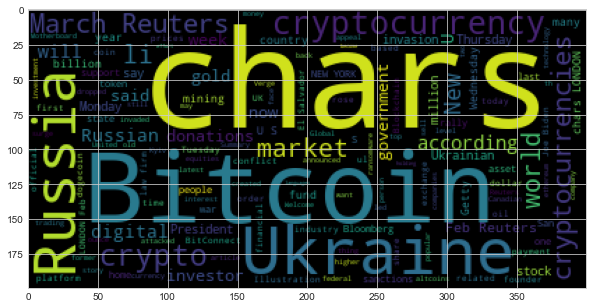

In [24]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_big_string)
plt.imshow(wc)

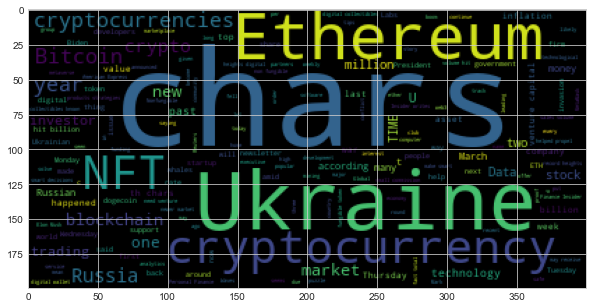

In [25]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
bitcoin_big_string

'When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars] "Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance," argues a columnist in the New York Times, "a form of \'digital gold\' that would be a source of stability as … [+3914 chars] Feb 22 (Reuters) - Bitcoin miners are feeling the heat - and the pain\'s rippling downstream to pressure prices.\r\nThe cryptocurrency\'s spectacular rally in 2021 drew thousands of entrants into mining,… [+4196 chars] March 1 (Reuters) - Bitcoin has leapt since Russia\'s invasion of Ukraine, bolstered by people in those countries looking to store and move money in anonymous and decentralised crypto.\r\nBitcoin tradin… [+3955 chars] Whose side is cryptocurrency on? If you had asked Satoshi Nakamoto, the pseudonymous person (or persons) who created the Bitcoin p

In [30]:
# Run the NER processor on all of the text
bitcoin_ner=nlp(bitcoin_big_string)
# Add a title to the document
bitcoin_ner.user_data['title'] = 'BTC'

In [31]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [32]:
# List all Entities
entities = [ent.text for ent in bitcoin_ner.ents if ent.label_ in ['GPE']]
entities = list(set(entities))
print ("Entities : " + str(entities))

Entities : ['NEW YORK', 'documents</li></ul', 'Canada', 'Uk', 'Bloomberg', 'London', 'Thailand', 'WASHINGTON', 'SAN SALVADOR', 'U.S.', 'US', 'Mexico City', "El Salvador's", 'TOKYO', 'Ukraine', 'the United States', 'the United Arab Emirates', 'Ukrainian', 'Discover', 'LONDON', 'El Salvador', 'Miami', 'San Jose', 'Russia', 'Kyiv', 'Colorado', 'UK', 'Getty Images', 'New York', 'San Diego']


---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
ethereum_big_string

'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars] Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin\'s share dropped dramatically.\xa0\r\nBetween 2020 and 2021, ethereum trading volume in… [+1187 chars] Illustration by James Bareham / The Verge\r\n\n \n\n\n More than $15 million has been donated so far More than $15 million in cryptocurrency has been donated to Ukrainian groups since Russia attacked the c… [+7442 chars] If it sounds too good to be true, youre not wrong. Yield farming is riskier than staking. The tokens that are offering such high interest rates and fee yields are also the ones most likely to take a … [+2371 chars] It seems that in 2022, you cant escape from the metaverse.\xa0From Facebook to Microsoft, seemingly every centralized tech firm

In [34]:
# Run the NER processor on all of the text
ethereum_ner=nlp(ethereum_big_string)
# Add a title to the document
ethereum_ner.user_data['title'] = 'ETH'

In [35]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [36]:
# List all Entities
entities = [ent.text for ent in ethereum_ner.ents if ent.label_ in ['GPE']]
entities = list(set(entities))
print ("Entities : " + str(entities))

Entities : ['Uk', 'Temasek', 'Bloomberg', 'micro-', 'Kingship', 'Singapore', 'US', 'Ukraine', 'B.C.', 'Turkey', 'Ukrainian', 'Bali', 'The United States', 'NY', 'Miami', 'Russia', 'Kyiv', 'UK', 'Getty Images', 'New York']


---